# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Gheffira Tsuraya Gunawan
- **Email:** gheffira.tsuraya1003@mail.ugm.ac.id
- **ID Dicoding:** gheffira_tsuraya

## Menentukan Pertanyaan Bisnis

1.  Which station has the highest and the lowest PM2.5 concentration?
2. Most of the air/wind affected by PM2.5 pollution moves in which direction?

## Import Semua Packages/Library yang Digunakan

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
data_aoti = pd.read_csv("/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
data_changping = pd.read_csv("/content/PRSA_Data_Changping_20130301-20170228.csv")
data_dingling = pd.read_csv("/content/PRSA_Data_Dingling_20130301-20170228.csv")
data_dongsi = pd.read_csv("/content/PRSA_Data_Dongsi_20130301-20170228.csv")
data_guanyuan = pd.read_csv("/content/PRSA_Data_Guanyuan_20130301-20170228.csv")
data_gucheng = pd.read_csv("/content/PRSA_Data_Gucheng_20130301-20170228.csv")
data_huairou = pd.read_csv("/content/PRSA_Data_Huairou_20130301-20170228.csv")
data_nongzha = pd.read_csv("/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
data_shunyi = pd.read_csv("/content/PRSA_Data_Shunyi_20130301-20170228.csv")
data_tiantan = pd.read_csv("/content/PRSA_Data_Tiantan_20130301-20170228.csv")
data_wanliu = pd.read_csv("/content/PRSA_Data_Wanliu_20130301-20170228.csv")
data_wanshou = pd.read_csv("/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

### Assessing Data

Combines all data from various stations

In [ ]:
data = [data_aoti, data_changping, data_dingling, data_dongsi, data_guanyuan, data_gucheng, data_huairou, data_nongzha, data_shunyi, data_tiantan, data_wanliu, data_wanshou]
data = pd.concat(data)
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


checking the information of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


Checking Missing Value

In [ ]:
data.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Based on the checking results, there are many missing values.



Checking Duplicate Data

In [ ]:
data.duplicated().sum()

0

### Cleaning Data

To do data cleaning, we must do what should we do to missing values.First we could checking the missing value percentage so that we could decide the next step

In [313]:
#checking the percentage of missing values from each variables to decide if we should drop all the missing values or not
missing_value_in_percent = 100 * data.isnull().sum() / len(data)
missing_value_in_percent

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
predict    0.000000
dtype: float64

Because the total missing values from various variabels are > 5%, it's not good to drop the missing values so we'll impute the missing values.

In [ ]:
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [ ]:
data1 = data.copy()
data1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [314]:
#Handling missing values
#Fill the missing values with the median value
for column in data1.columns[5:11]:  # Loop through column 5 until 10'
    data1[column] = data1.groupby('station')[column].transform(lambda x: x.fillna(x.median()))

In [315]:
#Handling missing values
#Fill the missing values with the mean value
for column in data1.columns[11:15]:  # Loop through column 11 until 14'
    data1[column] = data1.groupby('station')[column].transform(lambda x: x.fillna(x.mean()))

In [316]:
#Handling missing values by filling it with mode
data1['wd'] = data1['wd'].fillna(data1['wd'].mode()[0])

In [317]:
#Handling missing value by filling it with mean
mean_WSPM = data1['WSPM'].mean()
data1['WSPM'] = data1['WSPM'].fillna(mean_WSPM)

In [319]:
#Checking missing values
data1.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
predict     0
dtype: int64

## Exploratory Data Analysis (EDA)

In [ ]:
data1.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.273026,104.235659,15.642997,50.384959,1212.909829,56.925748,13.538931,1010.746341,2.490654,0.064475,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.064127,91.123375,21.456742,34.714968,1134.271612,55.830557,11.430737,10.469404,13.787251,0.820624,NaN,1.245914,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,23.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [311]:
data1.groupby(by="station")['PM2.5'].nunique().sort_values(ascending=False).reset_index().head(10)

,station,PM2.5
0,Wanshouxigong,585
1,Dongsi,582
2,Gucheng,577
3,Shunyi,567
4,Nongzhanguan,565
5,Guanyuan,557
6,Aotizhongxin,545
7,Tiantan,545
8,Wanliu,539
9,Dingling,486


## Visualization & Explanatory Analysis

### Pertanyaan 1:

## Which station has the highest PM2.5 concentration?

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-304-1b606dd48edb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = data1, x='station', y='PM2.5', dodge = False, ax = ax, palette = 'turbo')


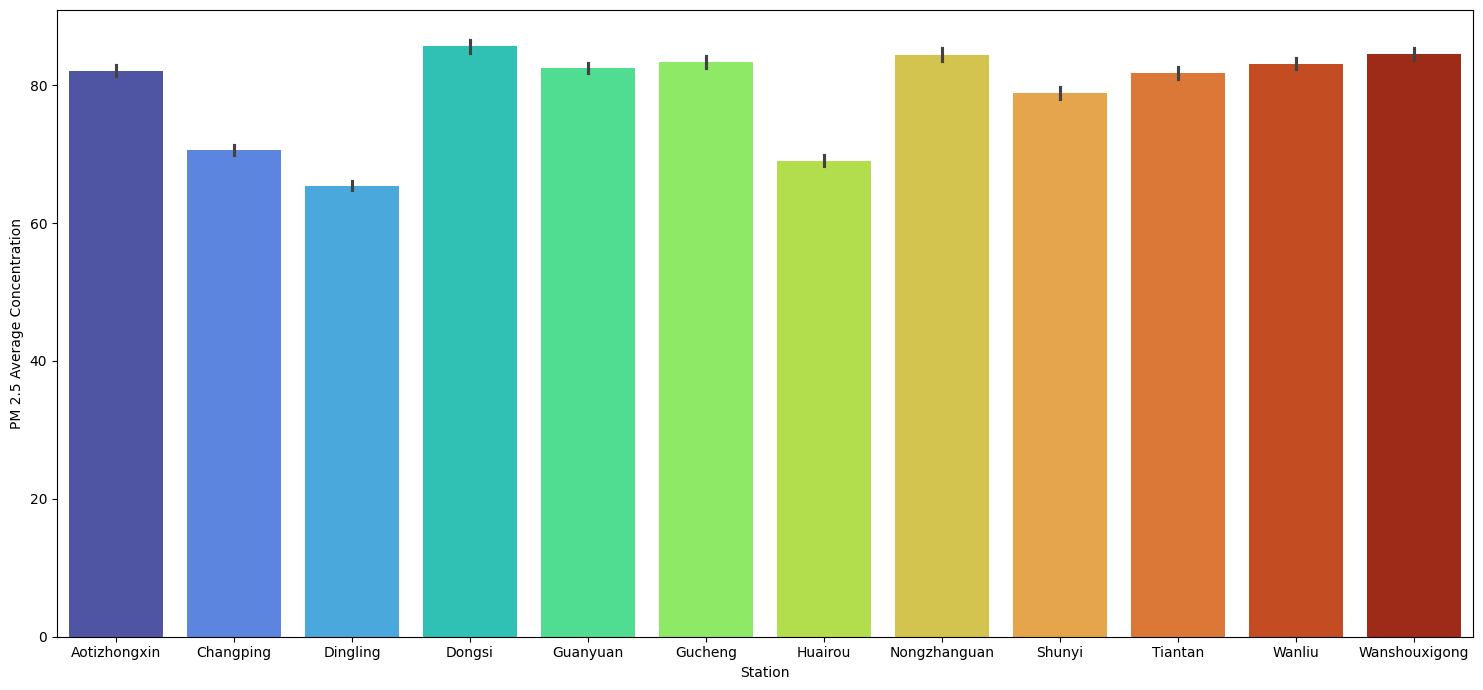

In [ ]:
fig, ax = plt.subplots(figsize = (15, 7))

ax = sns.barplot(data = data1, x='station', y='PM2.5', dodge = False, ax = ax, palette = 'turbo')
plt.xlabel('Station')
plt.ylabel('PM 2.5 Average Concentration')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

## Most of the air/wind affected by PM2.5 pollution moves in which direction?

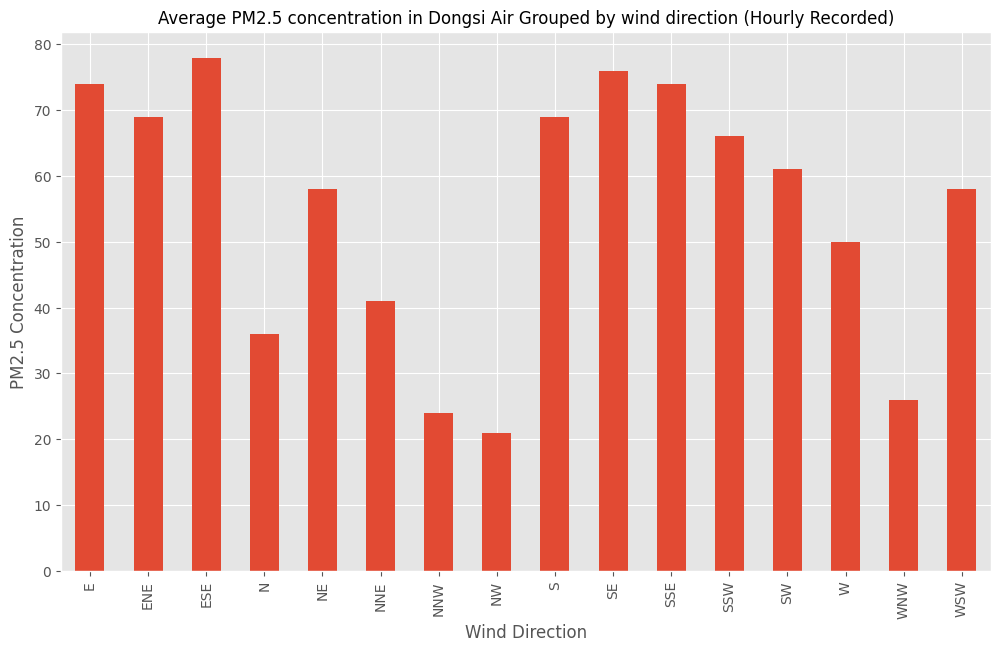

In [ ]:
wind = data1[['wd','PM2.5']].groupby('wd').median()
# plot
with plt.style.context('ggplot'):
  wind.plot(figsize=(12,7),legend=False,kind='bar',linewidth=.9)
plt.title('Average PM2.5 concentration in Dongsi Air Grouped by wind direction (Hourly Recorded)',fontsize=12)
plt.xlabel('Wind Direction')
plt.ylabel('PM2.5 Concentration')
plt.show()

In [ ]:
data1.to_csv("data1.csv", index=False)

## Conclusion

1. From the graphic, we know that station that has the highest average PM2.5 concentration is Dongsi station and station with the lowest average concentration of PM2.5 is Dingling. From the graphic we know about the average concentration of PM2.5 pollutant so that we could evaluate it. The information provided by the graphic could be used to evaluate the air quality of every station so that we know which station needs extra care. For example, the related parties could put more effort to decreasing the air pollution in Dongsi station
2. Most of the air/wind affected by PM2.5 pollution moves to east southeast. The information could help us understand more about the pollution dispersion. It could also improving forcast accuracy.